In [12]:
import pandas as pd
import numpy as np
import category_encoders as ce

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from pdpbox import pdp, info_plots
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

In [66]:
df = pd.read_csv('./Amazon-Ranking-Analysis.csv') 

In [78]:
#data with products with 50 or more vendors
df1 = pd.read_csv('./Amazon-Ranking-Analysis>50.csv')

In [68]:
df1

,Index,ProductName,ScrapeDate,ScrapedIndex,ScrapedIndexTrueRank,CorrectedIndexTrueRank,ScrapedIndexPrice,CorrectedPrice,ScrapedIndexVendor,ScrapedIndexVendorType
0,189,AOC e1659Fwu 16-Inch Ultra Slim 1366x768 Res 2...,6/21/16,2,2,1,107.73,107.73,BuyVPC,Other
1,190,AOC e1659Fwu 16-Inch Ultra Slim 1366x768 Res 2...,6/21/16,3,3,2,109.80,109.80,pcrush-outlet,Other
2,191,AOC e1659Fwu 16-Inch Ultra Slim 1366x768 Res 2...,6/21/16,1,1,3,99.99,109.97,Amazon.com,Amazon
3,192,AOC e1659Fwu 16-Inch Ultra Slim 1366x768 Res 2...,6/21/16,4,4,4,109.99,109.99,Technology Galaxy,Other
4,193,AOC e1659Fwu 16-Inch Ultra Slim 1366x768 Res 2...,6/21/16,5,5,5,111.53,111.53,Brooklyn Parkway,Other
...,...,...,...,...,...,...,...,...,...,...
3169,6706,"Tombow Mono Permanent Adhesive Refills, 3 Pack...",6/21/16,54,53,52,27.55,27.55,ADVENTURER'S BAG,Other
3170,6707,"Tombow Mono Permanent Adhesive Refills, 3 Pack...",6/21/16,55,54,53,28.15,28.15,langton_distribution_,Other
3171,6708,"Tombow Mono Permanent Adhesive Refills, 3 Pack...",6/21/16,56,55,54,29.25,29.25,Treyco,Other
3172,6709,"Tombow Mono Permanent Adhesive Refills, 3 Pack...",6/21/16,57,56,55,30.13,30.13,M&E JAPAN,Other


In [14]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6973 entries, 0 to 6972
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Index                   6973 non-null   int64  
 1   ProductName             6973 non-null   object 
 2   ScrapeDate              6973 non-null   object 
 3   ScrapedIndex            6973 non-null   int64  
 4   ScrapedIndexTrueRank    6973 non-null   int64  
 5   CorrectedIndexTrueRank  6973 non-null   int64  
 6   ScrapedIndexPrice       6973 non-null   float64
 7   CorrectedPrice          6973 non-null   float64
 8   ScrapedIndexVendor      6973 non-null   object 
 9   ScrapedIndexVendorType  6973 non-null   object 
 10  BBScrapedPrice          6973 non-null   float64
 11  BBVendorType            6973 non-null   object 
 12  BBVendor                6809 non-null   object 
 13  BBCorrectedPrice        6973 non-null   float64
dtypes: float64(4), int64(4), object(6)
memor

In [15]:
#sorting the data first by the products, then by the corrected index true rank, and lastly, by the corrected price. 
df = df.sort_values(by=['ProductName',
                     'CorrectedIndexTrueRank',
                         "CorrectedPrice"])
df

,Index,ProductName,ScrapeDate,ScrapedIndex,ScrapedIndexTrueRank,CorrectedIndexTrueRank,ScrapedIndexPrice,CorrectedPrice,ScrapedIndexVendor,ScrapedIndexVendorType,BBScrapedPrice,BBVendorType,BBVendor,BBCorrectedPrice
0,0,#1 BEST Probiotic Supplement - 60 Day Supply w...,2016-06-14,2,2,1,20.99,20.99,Supplement Warriors,Other,-1.00,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02
1,1,#1 BEST Probiotic Supplement - 60 Day Supply w...,2016-06-14,1,1,2,19.99,25.02,Sharp Nutrition,FBA,-1.00,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02
2,2,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016-06-27,1,1,1,3.96,3.96,speedy tests,Other,4.90,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97
3,3,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016-06-27,2,1,1,3.96,3.96,Drug Abuse Control,Other,4.90,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97
4,4,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016-06-27,3,1,1,3.96,3.96,Lowest Priced Tests,Other,4.90,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6968,6968,myBaby SoundSpa Portable,2016-08-30,11,11,10,34.14,34.14,AMAZIN',Other,19.99,Amazon,Ships from and sold by Amazon.com.,26.77
6969,6969,myBaby SoundSpa Portable,2016-08-30,12,12,11,34.98,34.98,Happy Titan,Other,19.99,Amazon,Ships from and sold by Amazon.com.,26.77
6970,6970,myBaby SoundSpa Portable,2016-08-30,13,13,12,35.00,35.00,DDN INC,Other,19.99,Amazon,Ships from and sold by Amazon.com.,26.77
6971,6971,myBaby SoundSpa Portable,2016-08-30,8,8,13,31.95,38.73,Marilyn's Galleria,FBA,19.99,Amazon,Ships from and sold by Amazon.com.,26.77


In [104]:
df1

,Index,ProductName,ScrapeDate,ScrapedIndex,ScrapedIndexTrueRank,CorrectedIndexTrueRank,ScrapedIndexPrice,CorrectedPrice,ScrapedIndexVendor,ScrapedIndexVendorType
0,189,AOC e1659Fwu 16-Inch Ultra Slim 1366x768 Res 2...,6/21/16,2,2,1,107.73,107.73,BuyVPC,Other
1,190,AOC e1659Fwu 16-Inch Ultra Slim 1366x768 Res 2...,6/21/16,3,3,2,109.80,109.80,pcrush-outlet,Other
2,191,AOC e1659Fwu 16-Inch Ultra Slim 1366x768 Res 2...,6/21/16,1,1,3,99.99,109.97,Amazon.com,Amazon
3,192,AOC e1659Fwu 16-Inch Ultra Slim 1366x768 Res 2...,6/21/16,4,4,4,109.99,109.99,Technology Galaxy,Other
4,193,AOC e1659Fwu 16-Inch Ultra Slim 1366x768 Res 2...,6/21/16,5,5,5,111.53,111.53,Brooklyn Parkway,Other
...,...,...,...,...,...,...,...,...,...,...
2865,6706,"Tombow Mono Permanent Adhesive Refills, 3 Pack...",6/21/16,54,53,52,27.55,27.55,ADVENTURER'S BAG,Other
2866,6707,"Tombow Mono Permanent Adhesive Refills, 3 Pack...",6/21/16,55,54,53,28.15,28.15,langton_distribution_,Other
2867,6708,"Tombow Mono Permanent Adhesive Refills, 3 Pack...",6/21/16,56,55,54,29.25,29.25,Treyco,Other
2868,6709,"Tombow Mono Permanent Adhesive Refills, 3 Pack...",6/21/16,57,56,55,30.13,30.13,M&E JAPAN,Other


In [11]:
#Different types of products
Products = df['ProductName'].unique()
Products

array(['#1 BEST Probiotic Supplement - 60 Day Supply with 100% Moneyback Guarantee - Improve Digestion, Bowel Regularity, & Increase Energy with the Most Potent Probiotic...',
       '10 Panel Dip Drug Testing Kit, Test for 10 Different Drugs. (1)',
       '2wayz FULL METAL BODY Garden Hose Splitter | Y Ball Valve Connector for Your Soaker Hose, outdoor faucet, sprinkler & drip irrigation systems. Includes: 10 Rubber Washers + 3 Years Guarantee. Enjoy!',
       '3 Pair Motorcycle Riding Glasses Smoke Clear Yellow',
       '3/4 gal Talstar Pro / One Multi Use Pest Control Insecticide (96 ounce jug)',
       '303 (30306) Protectant Trigger Sprayer, 32 fl. Oz',
       '303 (30313-CSR) Aerospace Protectant Trigger Sprayer, 32 Fl. oz.',
       '303 (30606) Fabric Guard Trigger Sprayer, 32 fl. oz.',
       '3M Utility Duct Tape 2929 Silver, 1.88 in x 50 yd 5.8 mils (Pack of 1)',
       '3M Virtua CCS Protective Eyewear 11872-00000-20, Foam Gasket, Anti Fog Lens, Clear',
       '4-Drawer Stor

In [79]:
#Narrowing down to products that were sold by 100 or more vendors
Counts = df['ProductName'].value_counts()
Counts1 = df1['ProductName'].value_counts()

In [73]:
Counts

Fujifilm INSTAX Mini Instant Film (Rainbow)                                                                                                           154
Suncast GHW1732 Resin Wicker Trash Hideaway                                                                                                           115
Fiskars 45mm Contour Rotary Cutter (195210-1001)                                                                                                      106
K&N 99-5000 Aerosol Recharger Filter Care Service Kit                                                                                                  95
Honeywell HT-908 Turbo Force Room Air Circulator Fan                                                                                                   90
                                                                                                                                                     ... 
Everydrop by Whirlpool Refrigerator Water Filter 4 EDR4RXD2 (Pack of 2)     

In [80]:
Counts1

Fujifilm INSTAX Mini Instant Film (Rainbow)                                                                                             154
Suncast GHW1732 Resin Wicker Trash Hideaway                                                                                             115
Fiskars 45mm Contour Rotary Cutter (195210-1001)                                                                                        106
K&N 99-5000 Aerosol Recharger Filter Care Service Kit                                                                                    95
Honeywell HT-908 Turbo Force Room Air Circulator Fan                                                                                     90
Sassy Developmental Bumpy Ball                                                                                                           88
Bushnell H2O Waterproof Compact Roof Prism Binocular, Black, 10 x 25-mm                                                                  87
ASUS (RT-AC68U) Wire

In [13]:
df.isnull().sum()

Index                       0
ProductName                 0
ScrapeDate                  0
ScrapedIndex                0
ScrapedIndexTrueRank        0
CorrectedIndexTrueRank      0
ScrapedIndexPrice           0
CorrectedPrice              0
ScrapedIndexVendor          0
ScrapedIndexVendorType      0
BBScrapedPrice              0
BBVendorType                0
BBVendor                  164
BBCorrectedPrice            0
dtype: int64

In [35]:
#
y = df['CorrectedPrice']
X = df.drop(['CorrectedPrice','ScrapedIndexTrueRank','ScrapedIndex','ScrapedIndexPrice','ScrapeDate','BBVendor','BBVendorType','BBScrapedPrice','BBCorrectedPrice' ], axis=1)

In [81]:
#
y1 = df1['CorrectedPrice']
X1 = df1.drop(['CorrectedPrice','ScrapedIndexTrueRank','ScrapedIndex','ScrapedIndexPrice','ScrapeDate'], axis=1)

In [36]:
X

,Index,ProductName,CorrectedIndexTrueRank,ScrapedIndexVendor,ScrapedIndexVendorType
0,0,#1 BEST Probiotic Supplement - 60 Day Supply w...,1,Supplement Warriors,Other
1,1,#1 BEST Probiotic Supplement - 60 Day Supply w...,2,Sharp Nutrition,FBA
2,2,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",1,speedy tests,Other
3,3,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",1,Drug Abuse Control,Other
4,4,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",1,Lowest Priced Tests,Other
...,...,...,...,...,...
6968,6968,myBaby SoundSpa Portable,10,AMAZIN',Other
6969,6969,myBaby SoundSpa Portable,11,Happy Titan,Other
6970,6970,myBaby SoundSpa Portable,12,DDN INC,Other
6971,6971,myBaby SoundSpa Portable,13,Marilyn's Galleria,FBA


In [37]:
y

0       20.99
1       25.02
2        3.96
3        3.96
4        3.96
        ...  
6968    34.14
6969    34.98
6970    35.00
6971    38.73
6972    39.99
Name: CorrectedPrice, Length: 6973, dtype: float64

Text(0, 0.5, 'Rank')

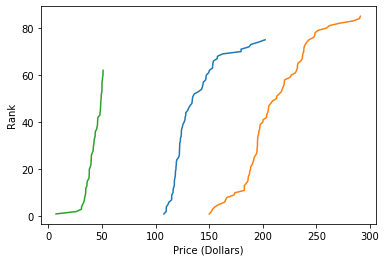

In [116]:
#Chose random three products to look at the relationship with ranking of vendors for each product with the prices (corrected)
Price=df1['CorrectedPrice'][0:83]
Rank= df1['CorrectedIndexTrueRank'][0:83]

plt.plot(Price, Rank)
plt.xlabel('Price (Dollars)')
plt.ylabel('Rank')

Price1=df1['CorrectedPrice'][141:227]
Rank1= df1['CorrectedIndexTrueRank'][141:227]

plt.plot(Price1, Rank1)
plt.xlabel('Price (Dollars)')
plt.ylabel('Rank')

Price2=df1['CorrectedPrice'][304:372]
Rank2= df1['CorrectedIndexTrueRank'][304:372]

plt.plot(Price2, Rank2)
plt.xlabel('Price (Dollars)')
plt.ylabel('Rank')


In [38]:
te = ce.TargetEncoder()
ore = ce.OrdinalEncoder()
ohe = ce.OneHotEncoder(use_cat_names=True)

In [56]:
#OrdinalEncoder
ore.fit_transform(X_train)
#250 products 

,Index,ProductName,CorrectedIndexTrueRank,ScrapedIndexVendor,ScrapedIndexVendorType
0,0,1,1,1,1
1,1,1,2,2,2
2,2,2,1,3,1
3,3,2,1,4,1
4,4,2,1,5,1
...,...,...,...,...,...
4178,4178,136,12,351,1
4179,4179,136,13,440,1
4180,4180,136,14,374,1
4181,4181,136,15,1946,1


In [55]:
#Target Encoder (average)
te.fit_transform(X_train,y_train)

,Index,ProductName,CorrectedIndexTrueRank,ScrapedIndexVendor,ScrapedIndexVendorType
0,0,31.926315,1,56.176964,55.276525
1,1,31.926315,2,56.176964,71.368684
2,2,11.450593,1,18.003304,55.276525
3,3,11.450593,1,56.176964,55.276525
4,4,11.450593,1,17.277850,55.276525
...,...,...,...,...,...
4178,4178,225.836104,12,63.689875,55.276525
4179,4179,225.836104,13,116.462274,55.276525
4180,4180,225.836104,14,61.741176,55.276525
4181,4181,225.836104,15,56.176964,55.276525


In [84]:
#Create cutoff point between train and test set (80% train, 20% test)
#Create cutoff point between train and val set (80% train, 20% val)
cutoff = int(df.shape[0]*.6)
val_cutoff = int(train.shape[0]*.6)

train, test = df[:cutoff].copy(), df[cutoff:].copy()
train, val = train[:val_cutoff].copy(), train[val_cutoff:].copy()


cutoff1 = int(df1.shape[0]*.6)
val_cutoff1 = int(train1.shape[0]*.6)

train1, test1 = df1[:cutoff1].copy(), df1[cutoff1:].copy()
train1, val1 = train1[:val_cutoff1].copy(), train1[val_cutoff1:].copy()

In [86]:
X_train = train.drop(['CorrectedPrice','ScrapedIndexTrueRank','ScrapedIndex','ScrapedIndexPrice','ScrapeDate','BBVendor','BBVendorType','BBScrapedPrice','BBCorrectedPrice' ], axis=1)
y_train = train['CorrectedPrice']

X_test = test.drop(['CorrectedPrice','ScrapedIndexTrueRank','ScrapedIndex','ScrapedIndexPrice','ScrapeDate','BBVendor','BBVendorType','BBScrapedPrice','BBCorrectedPrice' ], axis=1)
y_test = test['CorrectedPrice']

X_val = val.drop(['CorrectedPrice','ScrapedIndexTrueRank','ScrapedIndex','ScrapedIndexPrice','ScrapeDate','BBVendor','BBVendorType','BBScrapedPrice','BBCorrectedPrice' ], axis=1)
y_val = val['CorrectedPrice']


X_train1 = train1.drop(['CorrectedPrice','ScrapedIndexTrueRank','ScrapedIndex','ScrapedIndexPrice','ScrapeDate'], axis=1)
y_train1 = train1['CorrectedPrice']

X_test1 = test1.drop(['CorrectedPrice','ScrapedIndexTrueRank','ScrapedIndex','ScrapedIndexPrice','ScrapeDate'], axis=1)
y_test1 = test1['CorrectedPrice']

X_val1 = val1.drop(['CorrectedPrice','ScrapedIndexTrueRank','ScrapedIndex','ScrapedIndexPrice','ScrapeDate'], axis=1)
y_val1 = val1['CorrectedPrice']

In [87]:
te = ce.TargetEncoder()

X_train2 = te.fit_transform(X_train, y_train)
X_test2 = te.transform(X_test, y_test)


X_train3 = te.fit_transform(X_train1, y_train1)
X_test3 = te.transform(X_test1, y_test1)

In [88]:
gbm = GradientBoostingRegressor()

gbm.fit(X_train2, y_train)
gbm.score(X_train2, y_train), gbm.score(X_test2, y_test)

(0.9919592137487527, 0.11176321253841148)

In [89]:
gbm.fit(X_train3, y_train1)
gbm.score(X_train3, y_train1), gbm.score(X_test3, y_test1)
#Well that was a waste

(0.9988063757786901, -0.00022054617872457882)

In [45]:
pipe1 = make_pipeline(ce.OrdinalEncoder('ProductName'), GradientBoostingRegressor())
pipe2 = make_pipeline(ce.TargetEncoder("ProductName"), GradientBoostingRegressor())

In [46]:
pipe1.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['ProductName', 'ScrapedIndexVendor',
                                      'ScrapedIndexVendorType'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'ProductName',
                                          'data_type': dtype('O'),
                                          'mapping': #1 BEST Probiotic Supplement - 60 Day Supply with 100% Moneyback Guarantee - Improve Digestion, Bowel Regula...
                                           learning_rate=0.1, loss='ls',
                                           max_depth=3, max_features=None,
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                       

In [47]:
pipe2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('targetencoder',
                 TargetEncoder(cols=['ProductName', 'ScrapedIndexVendor',
                                     'ScrapedIndexVendorType'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', min_samples_leaf=1,
                               return_df=True, smoothing=1.0,
                               verbose='ProductName')),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                           criter...
                                           learning_rate=0.1, loss='ls',
                                           max_depth=3, max_features=None,
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                  

In [48]:
pipe1.score(X_test, y_test)

-13.739006739080265

In [49]:
pipe2.score(X_test, y_test)

0.11147499047544729

In [50]:
transformed_X = pipe2[0].transform(X_train)

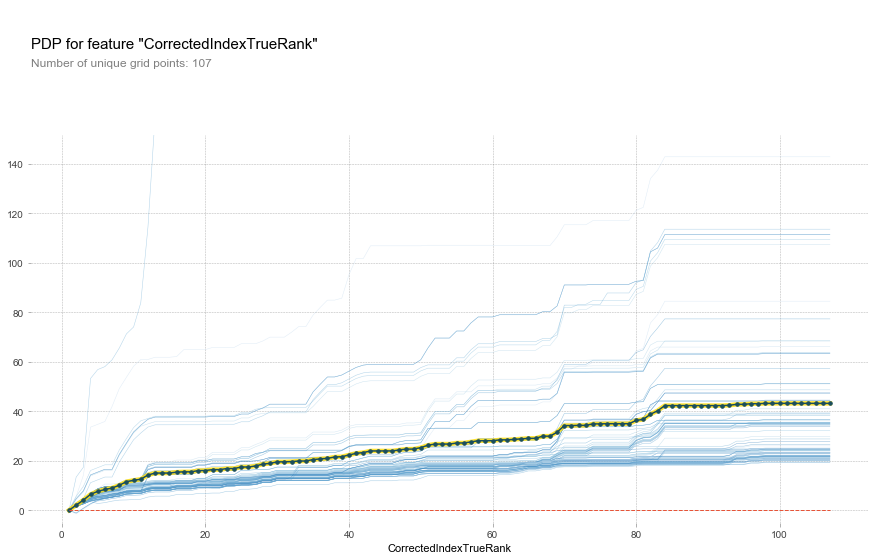

In [51]:
pdp_CorrectedIndexTrueRank = pdp.pdp_isolate(
    model=pipe2[1], dataset=transformed_X, model_features=transformed_X.columns.tolist(), 
    feature='CorrectedIndexTrueRank', cust_grid_points = transformed_X['CorrectedIndexTrueRank'].unique().tolist()
)

fig, axes = pdp.pdp_plot(pdp_CorrectedIndexTrueRank, 'CorrectedIndexTrueRank', plot_lines=True, frac_to_plot=100
                )

In [54]:
px.scatter(X_train, X ='CorrectedIndexTrueRank', y='CorrectedPrice', trendline='ols',title='Prices')

TypeError: scatter() got an unexpected keyword argument 'X'

In [57]:
feats = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': gbm.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [58]:
feats

,Feature,Importance
1,ProductName,0.969051
2,CorrectedIndexTrueRank,0.022478
0,Index,0.007578
3,ScrapedIndexVendor,0.000871
4,ScrapedIndexVendorType,0.000022


In [90]:
pipe = make_pipeline(ce.TargetEncoder(), gbm)

In [91]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('targetencoder',
                 TargetEncoder(cols=['ProductName', 'ScrapedIndexVendor',
                                     'ScrapedIndexVendorType'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', min_samples_leaf=1,
                               return_df=True, smoothing=1.0, verbose=0)),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                           criterion='friedma...
                                           learning_rate=0.1, loss='ls',
                                           max_depth=3, max_features=None,
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_sa

In [96]:
pipe.score(X_test, y_test)

0.000721974890461774

In [97]:
#find the best model parameters
n_estimators  = [50, 100,150, 200,250, 300]
learning_rate = [.05, .1, .2]
max_depth     = [3, 4, 5]
cv_scores     = []
# and cycle through our model parameters
for estimators in n_estimators:
    for rate in learning_rate:
        for depth in max_depth:
            print(f"Fitting model with parameters: n_estimators - {estimators}, learning_rate - {rate}, max_depth - {depth}")
            gbm   = GradientBoostingRegressor(n_estimators=estimators, learning_rate=rate, max_depth=depth, max_features=0.6)
            pipe  = make_pipeline(ce.TargetEncoder(), gbm)
            pipe.fit(X_train, y_train)
            score = pipe.score(X_test, y_test)
            print(f"Out-of-sample score: {score}")
            cv_scores.append((score, estimators, rate, depth))

Fitting model with parameters: n_estimators - 50, learning_rate - 0.05, max_depth - 3
Out-of-sample score: 0.004770434589937422
Fitting model with parameters: n_estimators - 50, learning_rate - 0.05, max_depth - 4
Out-of-sample score: 0.10144923040348641
Fitting model with parameters: n_estimators - 50, learning_rate - 0.05, max_depth - 5
Out-of-sample score: -0.03868536098003483
Fitting model with parameters: n_estimators - 50, learning_rate - 0.1, max_depth - 3
Out-of-sample score: 0.033668015083268554
Fitting model with parameters: n_estimators - 50, learning_rate - 0.1, max_depth - 4
Out-of-sample score: 0.07438595189447206
Fitting model with parameters: n_estimators - 50, learning_rate - 0.1, max_depth - 5
Out-of-sample score: -0.011213512016187588
Fitting model with parameters: n_estimators - 50, learning_rate - 0.2, max_depth - 3
Out-of-sample score: -0.1565189955905093
Fitting model with parameters: n_estimators - 50, learning_rate - 0.2, max_depth - 4
Out-of-sample score: 0.05

In [98]:
max(cv_scores)

(0.11647317251822986, 250, 0.2, 4)

In [99]:
score

0.10256847188700091

In [ ]:
#I really tried. I feel like the data initially without any clean up for already fit into a model with BBcorrected values. 

#I wanted to compare the prices with ranking of each vendor for each product. 

#Initially, I looked at the entire data set. 

#Then, I looked at data excluding the BBcorrected prices.

#Lastly, I looked at the data including products with 50 or more vendors. 

#Looking at the entire data set, it was def overfit. But the other two, I could not seem to figure out how to fix it. 